In [515]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [516]:
df = pd.read_csv("simplesample.csv")
df

,hours,scores
0,2.5,21
1,3.2,27
2,8.5,75
3,3.5,30
4,1.5,20
5,5.5,60
6,2.7,25
7,7.7,85
8,5.9,62
9,4.5,41


In [517]:
X = df[['hours']]
y = df[['scores']]

X_scaled = MinMaxScaler().fit_transform(X)
y_scaled = MinMaxScaler().fit_transform(y)

In [518]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,), name="Input_Layer"), 
    tf.keras.layers.Dense(units=6, activation='relu', name="Hidden_Layer"),
    tf.keras.layers.Dense(units=1, name="Output_Layer")
])

In [519]:
print("Model: ")
model.summary()
print("\n")

Model: 


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer (Dense)            │ (None, 6)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [520]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
    loss = 'mse',
    metrics = [tf.keras.metrics.R2Score()]
)
print("Model has compiled")

Model has compiled


In [521]:
history = model.fit(X_scaled, y_scaled, epochs=200, verbose=1)
print("Train model completed")

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0006 - r2_score: -7.9698
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.8283 - r2_score: -6.4250
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6797 - r2_score: -5.0925
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.5535 - r2_score: -3.9618
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4482 - r2_score: -3.0179
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3611 - r2_score: -2.2371
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2908 - r2_score: -1.6066
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2345 - r2_score: -1.1025
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1913 - r2_score: -0.7146
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1578 - r2_score: -0.4143
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1326 - r2_score: -0.1883
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1152

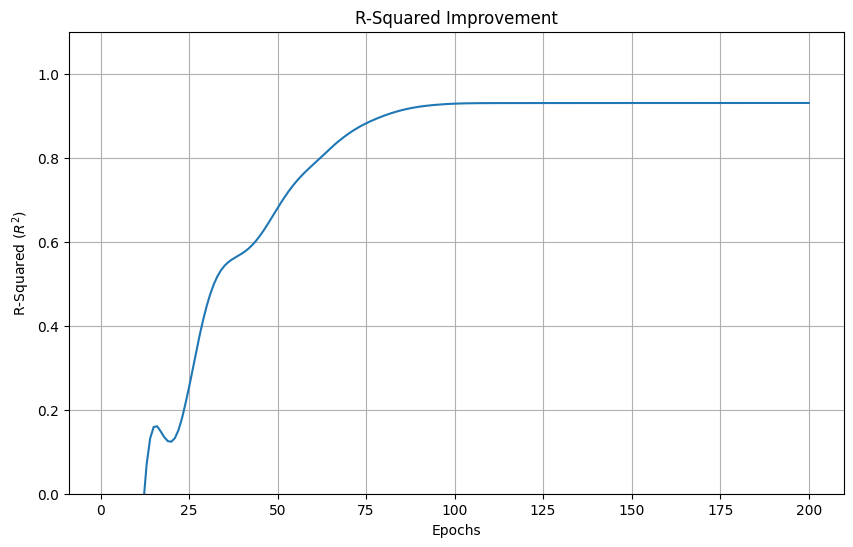

In [522]:
r_squared_history = history.history['r2_score']

plt.figure(figsize=(10,6))
plt.plot(range(1, len(r_squared_history) + 1), r_squared_history)
plt.title('R-Squared Improvement')
plt.xlabel('Epochs')
plt.ylabel('R-Squared ($R^2$)')
plt.grid(True)
plt.ylim(0, 1.1)
plt.show()